# Applied Data Science with Python: 
# Incremental Capstone 1 Session 4

### Project Statement: Develop a comprehensive solution for data aggregation, wrangling, and visualization using a healthcare dataset for the Aura platform. The goal is to effectively manage and process complex healthcare data to enable insightful analysis and enhance data-driven decision-making capabilities within Aura.


### Variable Descriptions

| **Variable**   | **Description**                                                                 | **Type** |
|----------------|---------------------------------------------------------------------------------|---------------|
| `visits`       | Number of physician office visits                                               | numeric         |
| `nvisits`      | Number of non-physician office visits                                           | numeric         |
| `ovisits`      | Number of physician hospital outpatient visits                                  | numeric         |
| `novisits`     | Number of non-physician hospital outpatient visits                              | numeric         |
| `emergency`    | Emergency room visits                                                           | numeric         |
| `health`       | Factor indicating self-perceived health                                         | categorical        |
| `chronic`      | Number of chronic conditions                                                    | numeric         |
| `adl`          | Factor indicating whether the individual has a condition that limits activities of daily living | categorical        |
| `region`       | Factor indicating region                                                        | categorical        |
| `age`          | Age in years (divided by 10)                                                    | numeric       |
| `hospital`     | Number of hospital stays                                                        | numeric         |
| `gender`       | Factor indicating gender                                                        | categorical        |
| `school`       | Number of years of education                                                    | numeric         |
| `employed`     | Factor. Is the individual employed?                                             | categorical        |
| `medicaid`     | Factor. Is the individual covered by Medicaid?                                  | categorical        |
| `married`      | Factor. Is the individual married?                                              | categorical        |
| `income`       | Family income in USD 10,000                                                     | numeric       |
| `insurance`    | Factor. Is the individual covered by private insurance?                         | categorical        |

## Two Huge Problems With This Dataset

1. Medicare: there is no explicit variable for __Medicare__. This is a significant omission, especially when analyzing individuals aged 65 and over — who, in the U.S., are generally eligible for Medicare. As a result, some individuals who appear uninsured may in fact be covered by Medicare, but are either:
- Captured under a generic `insurance` category
- Misclassified due to self-reporting, question ambiguity, or cognitive factors

2. Class Imbalance: In classification problems, it's important to check for **class imbalance** — when one category appears much more frequently than another. In this dataset, 90% of respondents are marked as `employed = no` and only 10% as `yes`, so models using this dataset may learn to always predict 'no' and still appear accurate, even though they're failing to detect the minority class. There are numerous class imbalances in this dataset, so tread carefully.

## Session 4 Tasks

1) Import relevant Python libraries necessary for Python and Pandas analysis, as well as visualization
2) Import the CSV file NSMES1988updated.csv file and create a new dataframe for working with Pandas
3) Indicate the plotting library choice and reasons for the choice
4) Plot the analysis done in Week 3 for the categorical data - Health and Region
5) Plot the analyses done in Week 4 (analysis and correlation)
6) Prepare a detailed report and record your observations.


### Task 1: Import relevant Python libraries necessary for Python and Pandas analysis, as well as visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Task 2: Import the CSV file NSMES1988updated.csv file and create a new dataframe for working with Pandas

In [7]:
df = pd.read_csv('../datasets/NSMES1988updated.csv')
df.head()


,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,5,0,0,0,0,1,average,2,normal,other,69.0,male,yes,6,28810.0000,yes,yes,no
1,1,0,2,0,2,0,average,2,normal,other,74.0,female,yes,10,27478.0020,no,yes,no
2,13,0,0,0,3,3,poor,4,limited,other,66.0,female,no,10,6531.9995,no,no,yes
3,16,0,5,0,1,1,poor,2,limited,other,76.0,male,yes,3,6588.0000,no,yes,no
4,3,0,0,0,0,0,average,2,limited,other,79.0,female,yes,6,6588.0000,no,yes,no


In [9]:
# remomve Unnamed: 0 column
if 'Unnamed: 0' in df.columns:
    print("Removing 'Unnamed: 0' column")
    df = df.drop(columns=['Unnamed: 0'])
df.head()

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,5,0,0,0,0,1,average,2,normal,other,69.0,male,yes,6,28810.0000,yes,yes,no
1,1,0,2,0,2,0,average,2,normal,other,74.0,female,yes,10,27478.0020,no,yes,no
2,13,0,0,0,3,3,poor,4,limited,other,66.0,female,no,10,6531.9995,no,no,yes
3,16,0,5,0,1,1,poor,2,limited,other,76.0,male,yes,3,6588.0000,no,yes,no
4,3,0,0,0,0,0,average,2,limited,other,79.0,female,yes,6,6588.0000,no,yes,no


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     4406 non-null   int64  
 1   nvisits    4406 non-null   int64  
 2   ovisits    4406 non-null   int64  
 3   novisits   4406 non-null   int64  
 4   emergency  4406 non-null   int64  
 5   hospital   4406 non-null   int64  
 6   health     4406 non-null   object 
 7   chronic    4406 non-null   int64  
 8   adl        4406 non-null   object 
 9   region     4406 non-null   object 
 10  age        4406 non-null   float64
 11  gender     4406 non-null   object 
 12  married    4406 non-null   object 
 13  school     4406 non-null   int64  
 14  income     4406 non-null   float64
 15  employed   4406 non-null   object 
 16  insurance  4406 non-null   object 
 17  medicaid   4406 non-null   object 
dtypes: float64(2), int64(8), object(8)
memory usage: 619.7+ KB


In [11]:
df.describe()

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,1.541988,74.024058,10.290286,25271.320501
std,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,6.334050,3.738736,29246.476319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,0.000000,-10125.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,69.000000,8.000000,9121.500000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,73.000000,11.000000,16981.500000
75%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,78.000000,12.000000,31728.500000
max,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,8.000000,109.000000,18.000000,548351.000000


### Task 3: Indicate the plotting library choice and reasons for the choice

# How To Decide: Plotting Library Comparison
| **Library** | **Best For** | **Customization** | **Interactivity** | **Ease of Use** |
|-------------|--------------|------------------|------------------|----------------|
| Matplotlib | Publication-quality static plots | 🌟🌟🌟🌟🌟 | 🌟 | 🌟🌟🌟 |
| Seaborn | Quick, attractive statistical plots | 🌟🌟🌟 | 🌟 | 🌟🌟🌟🌟 |
| Plotly | Interactive plots and dashboards | 🌟🌟🌟 | 🌟🌟🌟🌟🌟 | 🌟🌟🌟 |
| Bokeh | Interactive, custom web apps | 🌟🌟🌟🌟 | 🌟🌟🌟🌟 | 🌟🌟 |
This table helps you choose the right plotting library based on your needs for customization, interactivity, and ease of use.

### Task 4: Plot the analysis done in Session 1 & 2 (analysis and correlation)

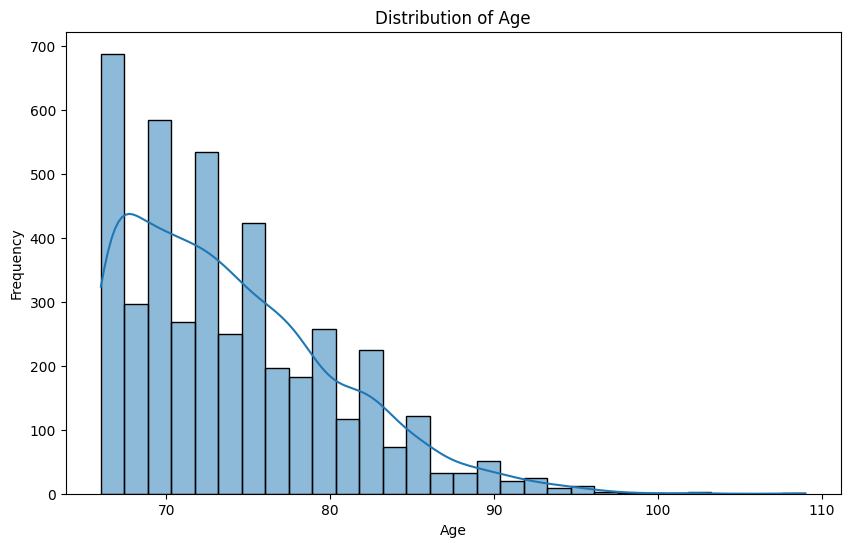

In [13]:
# distributionof Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


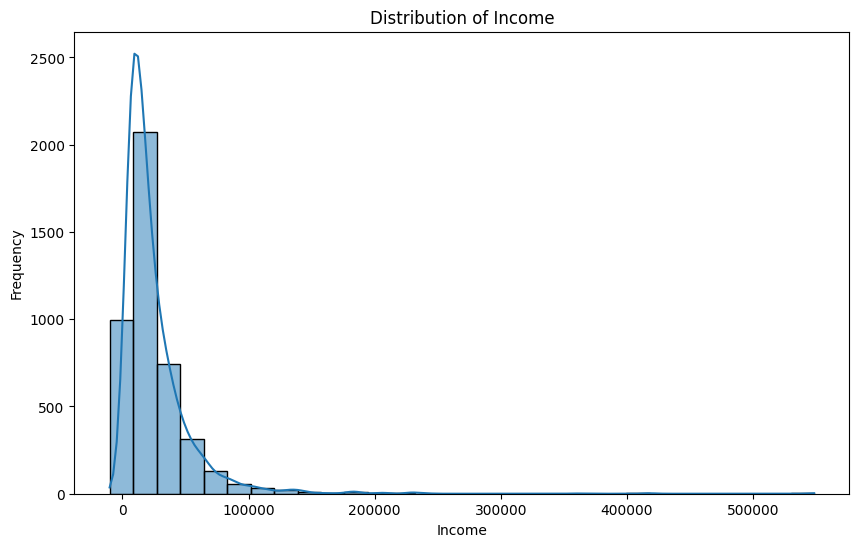

In [14]:
#distribution of Income
plt.figure(figsize=(10, 6))
sns.histplot(df['income'], bins=30, kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


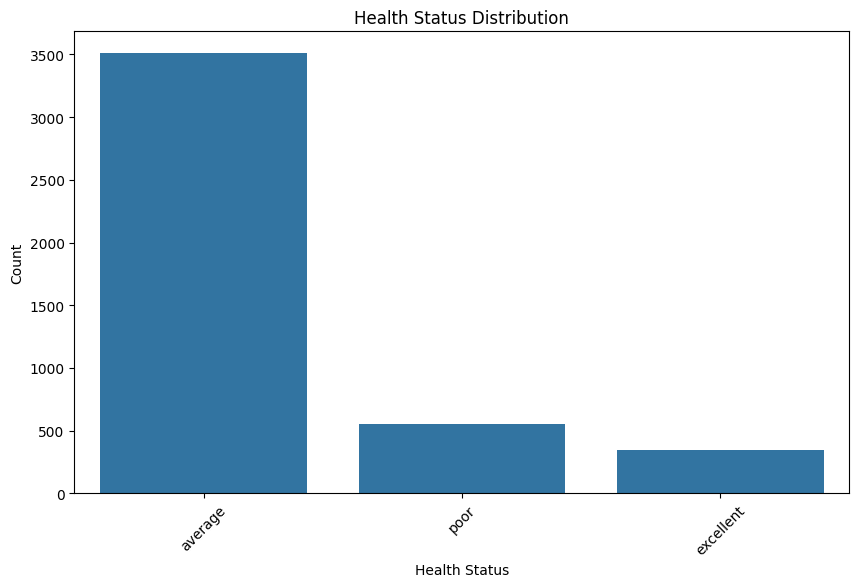

In [15]:
# Visualize the health status
plt.figure(figsize=(10, 6))
sns.countplot(x='health', data=df, order=df['health'].value_counts().index)
plt.title('Health Status Distribution')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

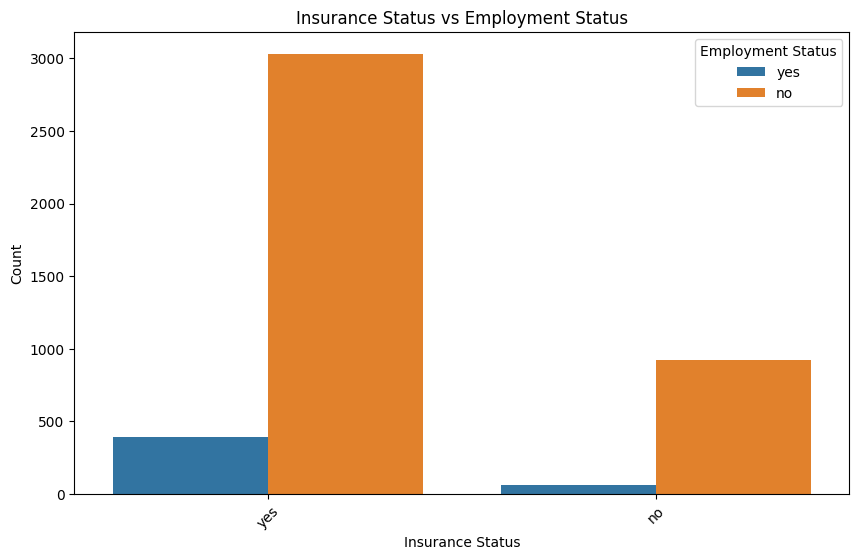

In [18]:
#visualise insurance status vs employment status
plt.figure(figsize=(10, 6))
sns.countplot(x='insurance', hue='employed', data=df, order=df['insurance'].value_counts().index)
plt.title('Insurance Status vs Employment Status')
plt.xlabel('Insurance Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Employment Status')
plt.show()


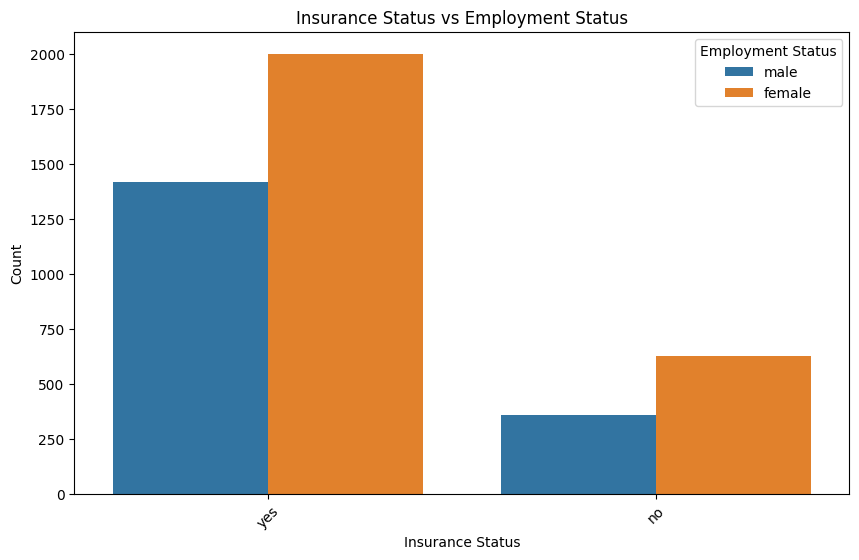

In [19]:
#visualize insurance vs gender
plt.figure(figsize=(10, 6))
sns.countplot(x='insurance', hue='gender', data=df, order=df['insurance'].value_counts().index)
plt.title('Insurance Status vs Employment Status')
plt.xlabel('Insurance Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Employment Status')
plt.show()

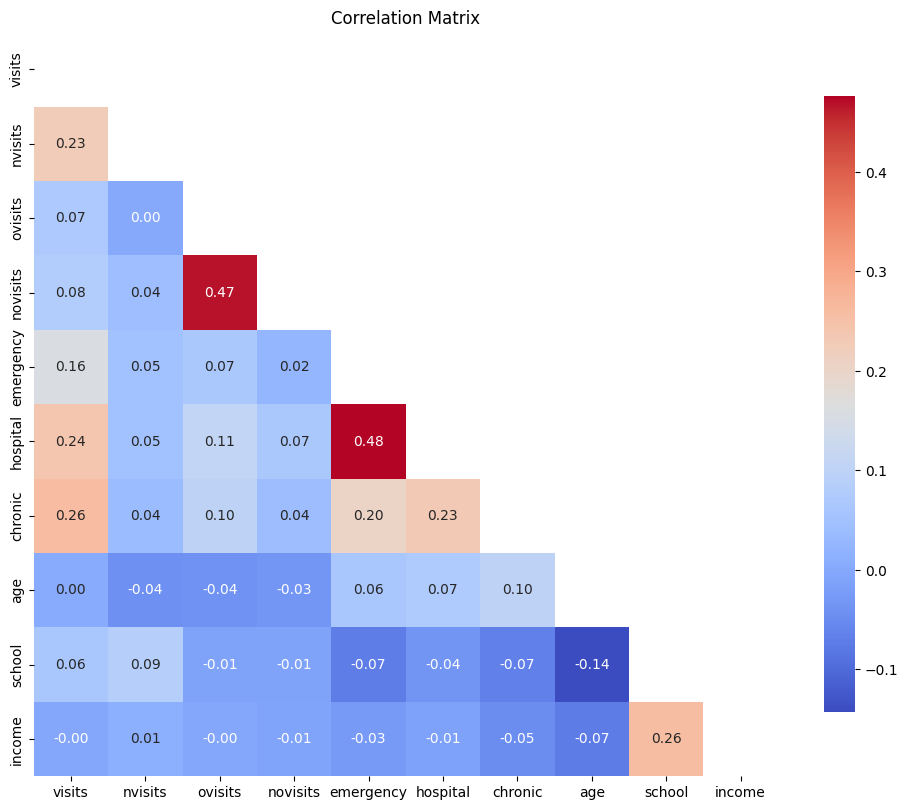

In [22]:
#correlation matrix upper triangle
plt.figure(figsize=(12, 10))
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt=".2f", mask=mask, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

### Task 5: Plot the analyses done in Session 3 for the categorical data - Health and Region

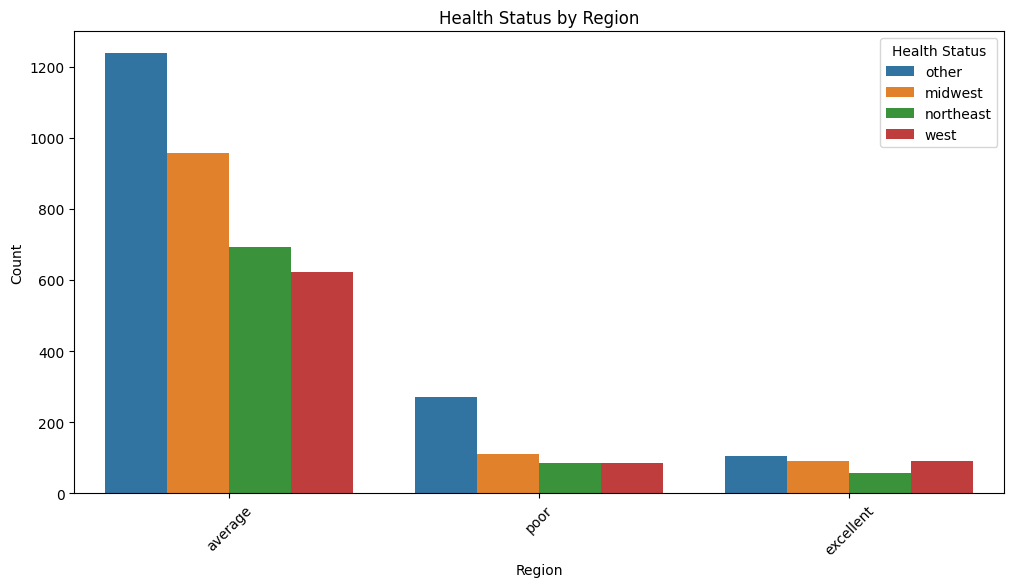

In [27]:
# visualize health vs region
plt.figure(figsize=(12, 6))
sns.countplot(x='health', hue='region', data=df, order=df['health'].value_counts().index)
plt.title('Health Status by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Health Status')
plt.show()



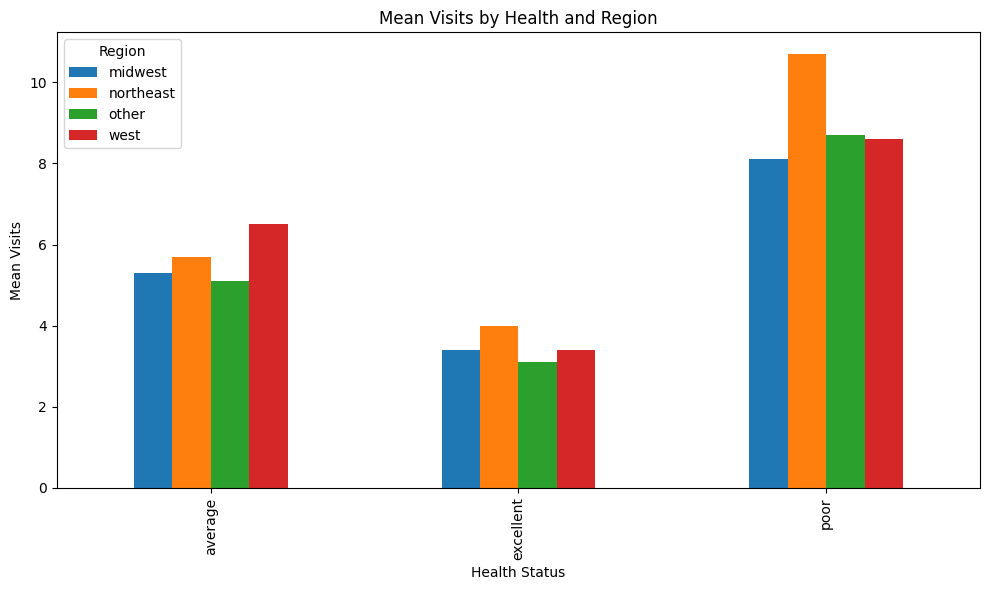

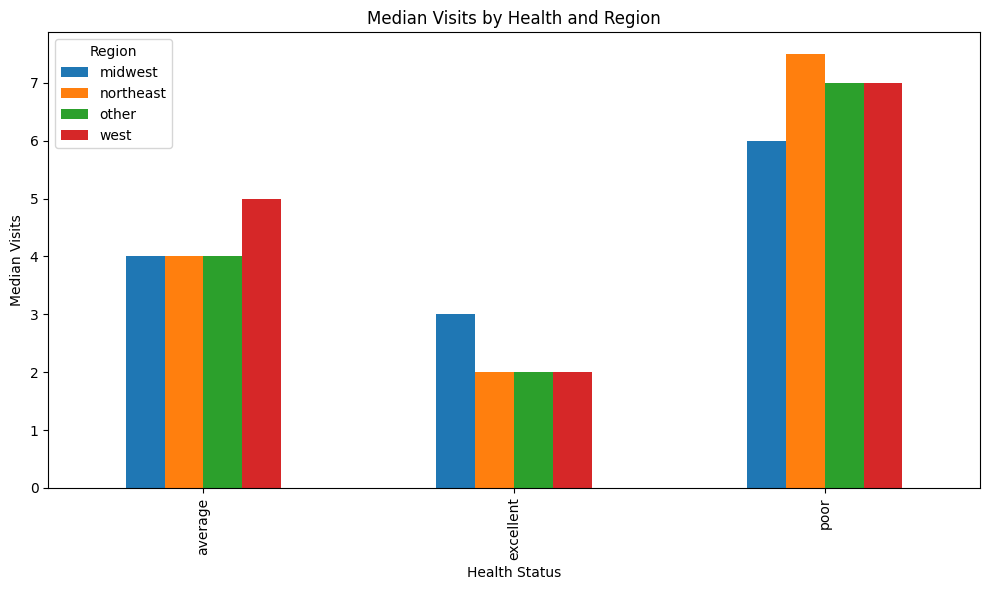

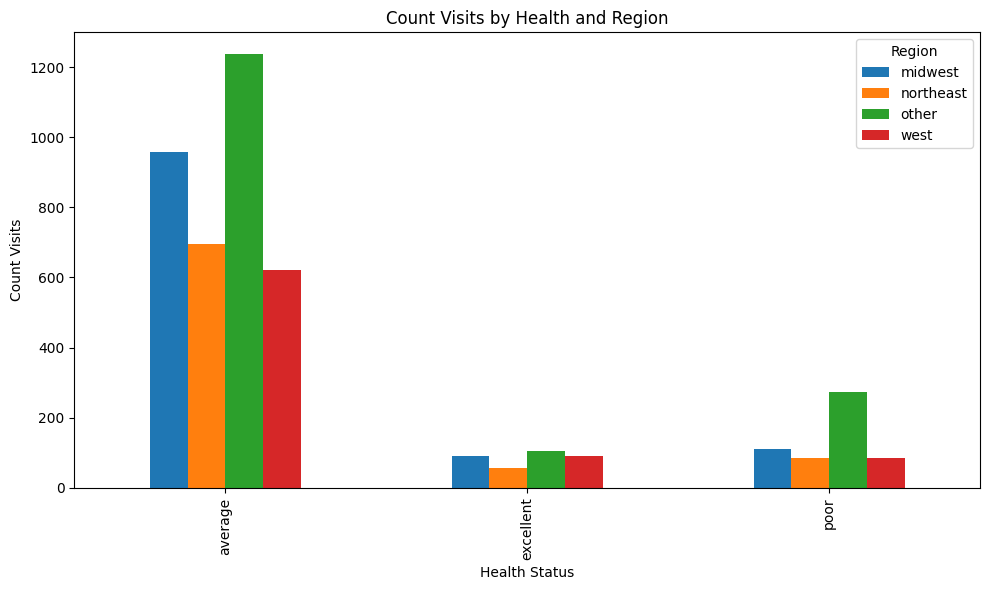

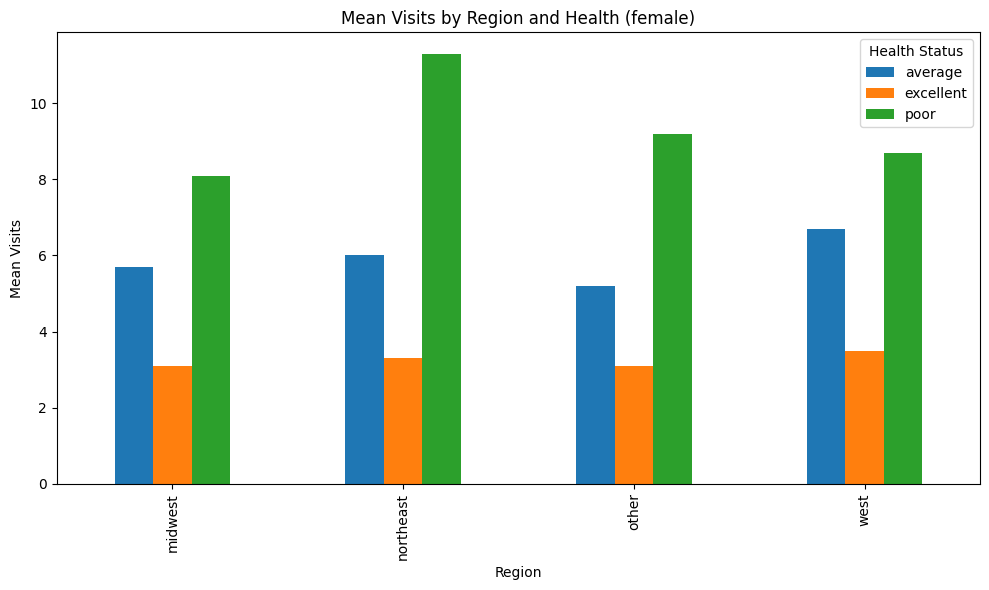

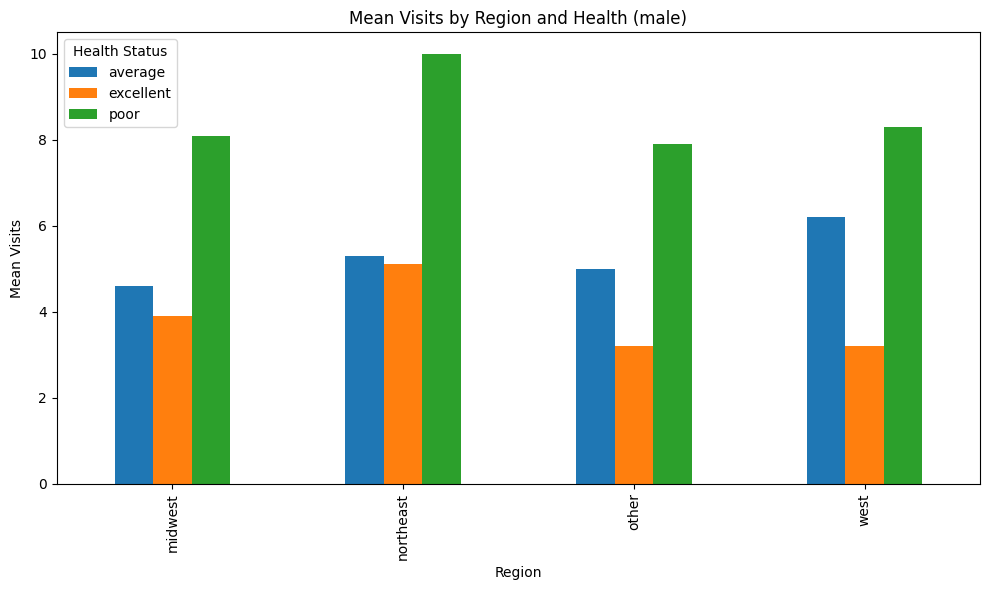

In [28]:
# Group, aggregate, and unstack
grouped = (
    df.groupby(['health', 'region'])['visits']
    .agg(['mean', 'median', 'count'])
    .round(1)
    .unstack()
)

# Plot each statistic separately
for stat in ['mean', 'median', 'count']:
    grouped[stat].plot(kind='bar', figsize=(10, 6))
    plt.title(f'{stat.capitalize()} Visits by Health and Region')
    plt.xlabel('Health Status')
    plt.ylabel(f'{stat.capitalize()} Visits')
    plt.legend(title='Region')
    plt.tight_layout()
    plt.show()
# Group, compute mean visits, round, unstack
grouped = (
    df.groupby(['gender', 'region', 'health'])['visits']
    .mean()
    .round(1)
    .unstack()
)

# For each gender, plot
for gender in grouped.index.levels[0]:
    grouped.loc[gender].plot(kind='bar', figsize=(10, 6))
    plt.title(f'Mean Visits by Region and Health ({gender})')
    plt.xlabel('Region')
    plt.ylabel('Mean Visits')
    plt.legend(title='Health Status')
    plt.tight_layout()
    plt.show()

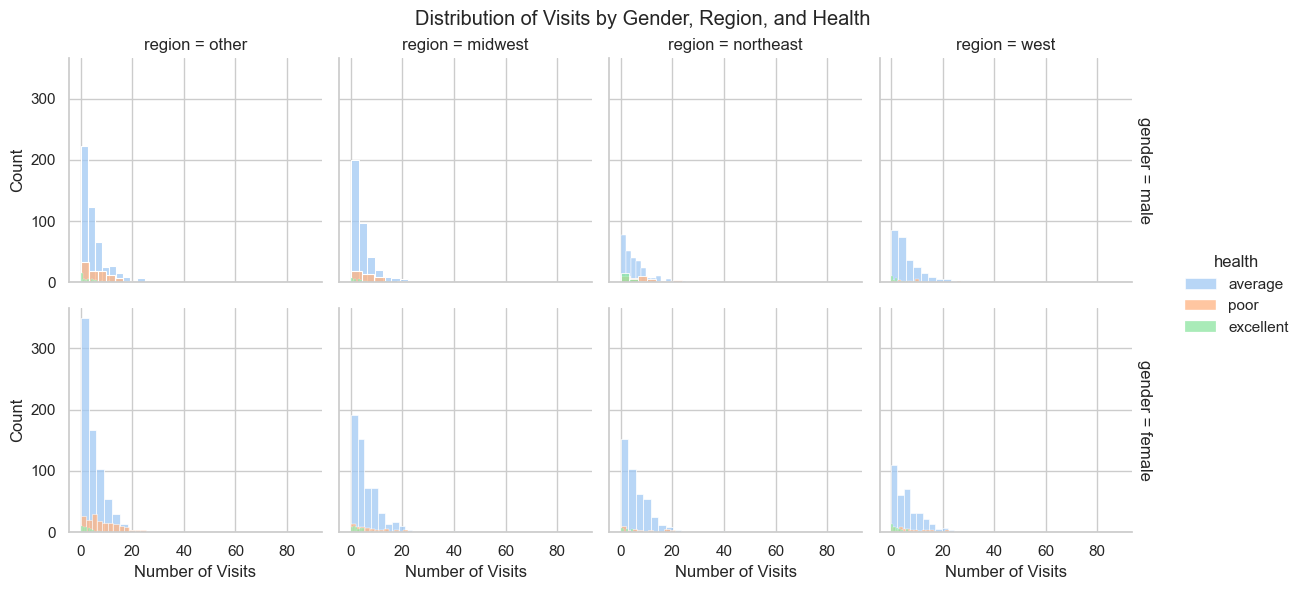

In [29]:
# Illustrate the distribution of visist by gender and region
# Set plot style
sns.set_theme(style="whitegrid")

# Facet by region and gender, color by health
g = sns.FacetGrid(df, col="region", row="gender", hue="health", margin_titles=True, palette="pastel")
g.map_dataframe(sns.histplot, x="visits", bins=20, kde=False, multiple="stack")
g.set_axis_labels("Number of Visits", "Count")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Visits by Gender, Region, and Health")
g.add_legend()

plt.show()

### Task 6: Prepare a detailed report and record your observations.


## Detailed Report & Key Findings

### 1. Data Overview
- The dataset contains 4,406 records and 18 variables, covering healthcare utilization, demographics, socioeconomic status, and insurance coverage.
- Variables include counts of visits (physician, non-physician, outpatient, emergency, hospital), health status, chronic conditions, age, education, income, and categorical factors such as gender, region, employment, and insurance.

### 2. Distributional Insights
- **Age**: The age distribution is right-skewed, with most respondents clustered in older age groups (reflecting the healthcare focus).
- **Income**: Income distribution is also right-skewed, with a majority earning below the higher income brackets.

### 3. Categorical Analysis
- **Health Status**: Most respondents report "average" health, with fewer in "excellent" or "poor" categories.
- **Region**: The dataset covers multiple regions, with "other" being the most frequent.
- **Insurance & Employment**: There is a notable class imbalance—most are not employed, and a majority have some form of insurance.

### 4. Correlation Analysis
- **Visits & Chronic Conditions**: The number of physician visits (`visits`) is moderately correlated with the number of chronic conditions (`chronic`, r ≈ 0.26) and hospital stays (`hospital`, r ≈ 0.24).
- **Emergency & Hospital**: Strong correlation between emergency visits and hospital stays (r ≈ 0.48), suggesting frequent ER users are also more likely to be hospitalized.
- **Education & Income**: Years of schooling (`school`) and income are positively correlated (r ≈ 0.26), as expected.
- **Age**: Age is weakly correlated with most healthcare utilization variables, but negatively correlated with education and income, indicating older individuals tend to have lower income and education levels in this sample.

### 5. Grouped & Comparative Analyses
- **Health by Region**: Poor health is more prevalent in certain regions, and mean visits are higher among those reporting poor health.
- **Gender Differences**: Females generally report more physician visits than males across all regions and health statuses.
- **Stacked Distributions**: The distribution of visits varies by gender, region, and health, with those in poor health consistently utilizing more healthcare services.

### 6. Visualization Choices
- **Seaborn** was primarily used for its ease of use and attractive statistical plots, with Matplotlib for customization.
- **Heatmaps** and **bar plots** effectively highlighted correlations and group differences.

### 7. Limitations & Considerations
- **Medicare Coverage**: The absence of a Medicare variable may lead to misclassification of insurance status, especially for older adults.
- **Class Imbalance**: Significant imbalance in categorical variables (e.g., employment) may bias predictive models and should be addressed in further analysis.

---

### **Summary of Key Findings**
- Chronic conditions and hospitalizations are the strongest drivers of healthcare utilization.
- Socioeconomic factors (education, income) are modestly associated with healthcare use.
- Regional and gender disparities exist in both health status and healthcare utilization.
- Data limitations (e.g., missing Medicare, class imbalance) must be considered in any modeling or policy recommendations.

**Recommendation:** Future analyses should address class imbalance, consider imputation or external data for Medicare, and further explore causal relationships using advanced statistical or machine learning methods.
```